In [ ]:
# instructed bound & array shape
np.random.choice: selects random options from a list
np.random.uniform: generates numbers between a given lower and upper bound
# can't assign bound
np.random.random: generates numbers between 0 and 1
# give array shape
np.random.randn: generates numbers from the standard normal distribution
# give array shape, mean, stdev
np.random.normal: generates numbers from a normal distribution with a specified mean and standard deviation

In [ ]:
# You pay 5 dollars and roll 3 dice. 
# If sum of dice rolls > 12, win $15. 
# If sum of dice rolls <= 12, win $0

# Assuming the dice are fair, should you play this game? 
# How would this change if the winning condition was a sum >= 12?

In [4]:
# throw 10,000 times
# each experiments = 3
n_trials = nrows = 10_000 # row
n_dice = ncols = 3        # column
# choose from 1-6, since dice in 1-6
rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
#, n_trials * n_dice --> total size of array
rolls

array([[6, 3, 4],
       [5, 3, 5],
       [6, 1, 3],
       ...,
       [4, 1, 3],
       [3, 6, 5],
       [3, 2, 6]])

In [6]:
rolls.sum(axis = 1)


array([13, 13, 10, ...,  8, 14, 11])

In [7]:
rolls.sum(axis = 1) > 12


array([ True,  True, False, ..., False,  True, False])

In [10]:
# calc probability of winning the game
(rolls.sum(axis = 1) > 12).astype(int).mean()


0.2552

In [16]:
# numpy convert to int under the hood
p_win = (rolls.sum(axis = 1) > 12).mean()


(array([ 158.,  284., 1184.,  990., 2415., 1270., 2085.,  723.,  721.,
         170.]),
 array([ 3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 16.5, 18. ]),
 <a list of 10 Patch objects>)

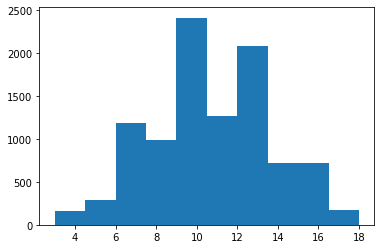

In [15]:
# %matplotlib notebook # can modify and save fig interactively
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(rolls.sum(axis = 1))

In [17]:
amount_we_win = 15
cost = 5
expected_winnings = p_win * amount_we_win

profit = expected_winnings - cost
profit


-1.1720000000000002

In [24]:
p_nap = 0.3
nap = np.random.random([10,2]) <= p_nap
nap


array([[ True, False],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [ True, False],
       [False, False]])

In [25]:
nap.sum(axis = 1)


array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [30]:
nap.sum(axis = 1) >= 1


array([ True, False,  True, False, False, False, False,  True,  True,
       False])

In [29]:
(nap.sum(axis = 1) >= 1).mean()

0.4

In [31]:
import pandas as pd

In [42]:
ntrials = 12_000
n_dice_rolled = 3

rols = np.random.choice([1,2,3,4,5,6], (ntrials, n_dice_rolled))
rols

array([[1, 3, 1],
       [4, 6, 4],
       [5, 5, 5],
       ...,
       [4, 4, 1],
       [2, 3, 4],
       [1, 3, 1]])

In [43]:
df = pd.DataFrame(rols)
df

,0,1,2
0,1,3,1
1,4,6,4
2,5,5,5
3,6,2,6
4,4,2,6
5,6,2,1
6,5,6,3
7,6,5,2
8,3,5,4
9,2,3,1


In [44]:
df.apply(lambda row: 3 in row.values, axis = 1) #in row.values return numpy array


0         True
1        False
2        False
3        False
4        False
5        False
6         True
7        False
8         True
9         True
10        True
11        True
12       False
13       False
14       False
15       False
16        True
17       False
18        True
19       False
20       False
21       False
22        True
23        True
24        True
25       False
26       False
27       False
28       False
29       False
         ...  
11970     True
11971    False
11972     True
11973    False
11974    False
11975     True
11976     True
11977     True
11978    False
11979    False
11980    False
11981    False
11982    False
11983    False
11984    False
11985    False
11986     True
11987    False
11988     True
11989    False
11990     True
11991     True
11992     True
11993     True
11994    False
11995    False
11996     True
11997    False
11998     True
11999     True
Length: 12000, dtype: bool

In [45]:
df.apply(lambda row: 3 in row.values, axis = 1).mean() # T/F can be trated as int


0.42025

In [46]:
np.random.seed(123)
#initalizing random state, so always get same random number
# specify this at very begining 

np.random.choice(['a','b','c'],3)

array(['c', 'b', 'c'], dtype='<U1')